## Claude-3.5-Sonnet

A Câmara dos Deputados é uma das duas casas do Congresso Nacional brasileiro, sendo composta por 513 deputados federais eleitos pelo povo para mandatos de quatro anos. Estes parlamentares representam os diferentes estados brasileiros e o Distrito Federal, com o número de representantes de cada unidade federativa sendo proporcional à sua população.

Como parte do Poder Legislativo, a Câmara tem como principais atribuições criar e aprovar leis, fiscalizar o Poder Executivo e debater questões de interesse nacional. Os deputados também são responsáveis por analisar o orçamento da União, propor emendas à Constituição e julgar crimes de responsabilidade cometidos por autoridades, como o Presidente da República, em conjunto com o Senado Federal.

## Gemini-1.5-FLash

A Câmara dos Deputados é uma das duas casas do Congresso Nacional brasileiro, sendo a outra o Senado Federal.  Ela é composta por deputados federais, eleitos por representação proporcional em cada estado, com o número de deputados por estado sendo proporcional à sua população.  A principal função da Câmara é legislar, ou seja, criar leis federais que regem o país.  Além disso, a Câmara também tem o poder de aprovar o orçamento anual do governo, fiscalizar as ações do Poder Executivo e julgar o Presidente da República em casos de crime de responsabilidade.

A representatividade da Câmara dos Deputados garante que diferentes regiões e grupos populacionais tenham voz no processo legislativo.  Os deputados são eleitos para mandatos de quatro anos, podendo ser reeleitos.  O funcionamento da Câmara é regido por um Regimento Interno, que define as normas de funcionamento e procedimentos para votações e debates.  A Câmara desempenha um papel fundamental na democracia brasileira, sendo um espaço de debate e construção de políticas públicas.

## GPT-4o-Mini

A Câmara dos Deputados é uma das duas casas do Congresso Nacional do Brasil, composta por 513 deputados federais eleitos pelo povo para mandatos de quatro anos. Os deputados representam diferentes estados e o Distrito Federal, com o número de representantes de cada unidade federativa sendo proporcional à sua população. A principal função da Câmara é elaborar e aprovar leis que regem o país, além de fiscalizar as ações do Poder Executivo e debater questões de interesse nacional.

Além de legislar, a Câmara dos Deputados também é responsável por analisar o orçamento da União, propor emendas à Constituição e julgar crimes de responsabilidade cometidos por autoridades, como o Presidente da República. O funcionamento da Câmara é regido por um Regimento Interno, que define normas e procedimentos para votações e debates, garantindo que a diversidade de vozes e interesses da população seja representada no processo legislativo.

Analisando as respostas dos três LLMs:

### Claude-3.5-Sonnet
**Vantagens:**
- A resposta é clara, concisa e traz um entendimento fácil.
- Destaca a representação proporcional e as responsabilidades legislativas, trazendo detalhes técnicos.

**Desvantagens:**
- Não traz muita ênfase nos procediemntos internos da câmara.

### Gemini-1.5-FLash
**Vantagens:**
- Traz uma explicação detalhada das funções legislativas e de fiscalização.
- Menciona o Regimento Interno, dando uma noção de como a Câmara funciona internamente.

**Desvantagens:**
- Resposta muito complexa. Para quem não está familiarizado com termos técnicos, pode ser de dfiicil compreensão.
 
### GPT-4o-Mini
**Vantagens:**
- Cobertura abrangente das funções da Câmara, desde legislação até julgamento de crimes de responsabilidade.
- Inclui informações sobre o Regimento Interno e o papel da Câmara na representação democrática.

**Desvantagens:**
- Alguns pontos são repetidos ou semelhantes às outras respostas, redundante.

### Diferenças gerais


   - **Claude-3.5-Sonnet** -  Resposta mais focada na descrição e nas funções básicas da Câmara.
   - **Gemini-1.5-FLash**  - Traz detalhes sobre representatividade e sobre o Regimento Interno, trazendo uma visão mais processual.
   - **GPT-4o-Mini** -  oferece uma visão compreensiva que abrange desde funções legislativas até detalhes de procedimentos internos, sendo mais detalhista na explicação das funções de julgamento e fiscalização.
   - **Claude** e **GPT-4o** são mais diretos e podem ser mais acessíveis para um público geral, enquanto **Gemini** usa um estilo que, embora informativo, pode ser um pouco mais denso e técnico.
   - Dependendo do contexto de uso (educacional, informativo, técnico), cada modelo pode ser preferido. Por exemplo, para um contexto educacional, o estilo de **GPT-4o** e **Claude** pode melhor, enquanto **Gemini** seria ideal para contextos onde um entendimento mais técnico é necessário.


## **Questão 3:**

In [9]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import google.generativeai as genai
from tqdm import tqdm
from google.genai import types

In [10]:
load_dotenv('.env')

True

In [11]:
genai.configure(api_key=os.environ["GEMINI_API_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")


In [12]:
# Configurações da API da Câmara dos Deputados
url_base = "https://dadosabertos.camara.leg.br/api/v2"

## **Letra A**

In [13]:

def coletar_dados_deputados(data_inicio='2024-08-01', data_fim='2024-08-30', output_dir="data", output_file="deputados.parquet"):
    """
    Coleta e salva dados dos deputados federais da API da Câmara dos Deputados.

    Args:
        data_inicio (str): Data de início no formato 'YYYY-MM-DD'.
        data_fim (str): Data de fim no formato 'YYYY-MM-DD'.
        output_dir (str): Diretório onde o arquivo será salvo. Default: 'data'.
        output_file (str): Nome do arquivo de saída. Default: 'deputados.parquet'.

    Returns:
        str: Caminho completo do arquivo salvo, ou mensagem de erro em caso de falha.
    """
    url = f"{url_base}/deputados"
    params = {'dataInicio': data_inicio, 'dataFim': data_fim}
    
    try:
        print(f"Coletando dados dos deputados de {data_inicio} a {data_fim}...")
        response = requests.get(url, params=params)
        response.raise_for_status()  # Levanta exceção para erros HTTP

        deputados_data = response.json().get("dados", [])
        if not deputados_data:
            raise ValueError("Nenhum dado foi retornado pela API.")

        # Converter para DataFrame
        df_deputados = pd.DataFrame(deputados_data)

        # Criar diretório se não existir
        os.makedirs(output_dir, exist_ok=True)

        # Salvar arquivo parquet
        output_path = os.path.join(output_dir, output_file)
        df_deputados.to_parquet(output_path, index=False)
        print(f"Dados dos deputados salvos em: {output_path}")
        return output_path

    except requests.exceptions.RequestException as e:
        print(f"Erro de requisição à API: {e}")
    except ValueError as ve:
        print(f"Erro de validação dos dados: {ve}")
    except Exception as ex:
        print(f"Ocorreu um erro inesperado: {ex}")

    return "Erro ao processar os dados dos deputados."

output_path = coletar_dados_deputados()


Coletando dados dos deputados de 2024-08-01 a 2024-08-30...
Dados dos deputados salvos em: data\deputados.parquet


## **Letra B**

In [14]:
prompt_grafico = """
Você é um especialista em visualização de dados usando Python. Gere um código que:

1. Leia um arquivo Parquet localizado no diretório "data" com o nome "deputados.parquet". Este arquivo contém informações sobre deputados federais, incluindo a coluna `siglaPartido` que identifica o partido de cada deputado.
2. Agrupe os deputados por partido (`siglaPartido`) e calcule:
   - O número total de deputados em cada partido.
   - O percentual correspondente de deputados de cada partido em relação ao total geral.
3. Crie um gráfico de pizza que mostre:
   - A quantidade percentual de deputados por partido.
   - Um título claro: "Distribuição de Deputados por Partido".
   - Um rótulo com o nome do partido e o percentual correspondente para cada fatia.
4. Use as bibliotecas `pandas` e `matplotlib` para essa tarefa.
5. Garanta que o gráfico tenha:
   - Título centralizado.
   - Grid desativado (pois gráficos de pizza não usam grid).
   - Cores diferenciadas para cada fatia.
6. Salve o gráfico no diretório `docs` com o nome "distribuicao_deputados.png".

Retorne somente o código Python, sem explicações ou texto adicional.
"""

In [15]:
response = model.generate_content(prompt_grafico)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt

# Certifique-se de que os diretórios 'data' e 'docs' existam
# Caso contrário, crie-os.  Exemplo:
# import os
# os.makedirs('data', exist_ok=True)
# os.makedirs('docs', exist_ok=True)


df = pd.read_parquet('data/deputados.parquet')

partidos = df.groupby('siglaPartido')['siglaPartido'].count()
total_deputados = len(df)
percentuais = (partidos / total_deputados) * 100

plt.figure(figsize=(10, 8))
plt.pie(percentuais, labels=[f'{p} ({percentual:.1f}%)' for p, percentual in zip(partidos.index, percentuais)], 
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Distribuição de Deputados por Partido', fontsize=16, pad=20, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.grid(False)
plt.savefig('docs/distribuicao_deputados.png')

```



In [16]:
import matplotlib.pyplot as plt

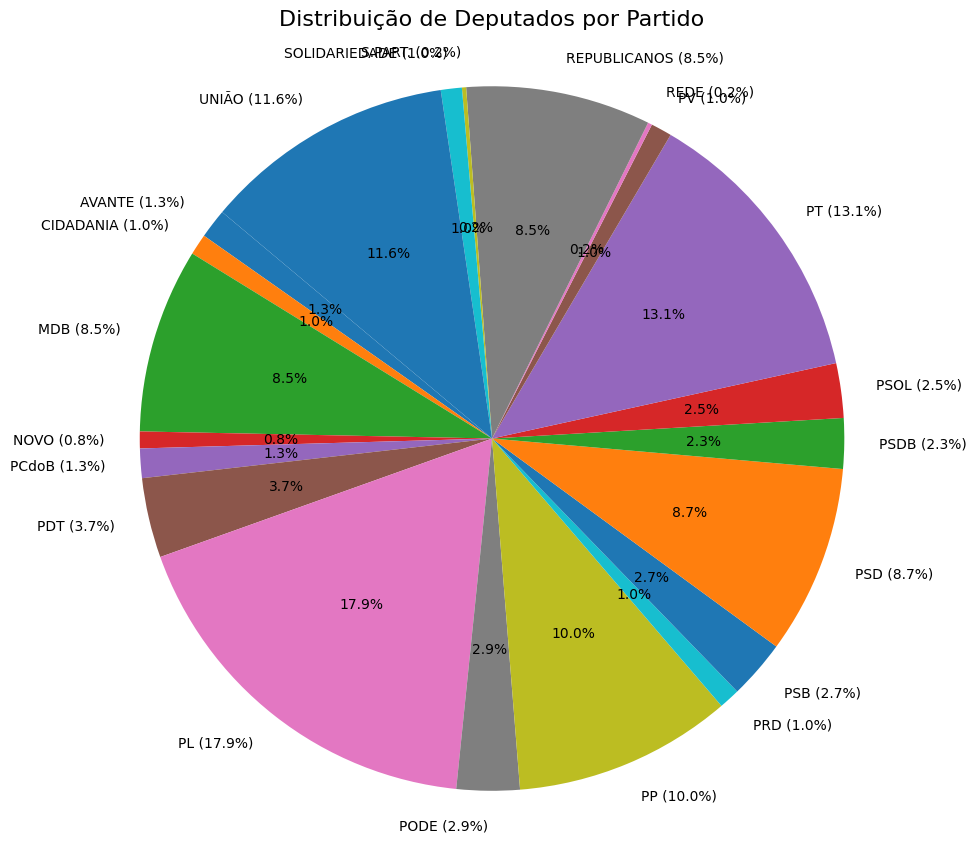

In [17]:
# Certifique-se de que o diretório 'data' exista e contenha o arquivo 'deputados.parquet'
# Certifique-se de que o diretório 'docs' exista

df = pd.read_parquet("data/deputados.parquet")

partidos = df.groupby("siglaPartido")["siglaPartido"].count()
total_deputados = len(df)
percentuais = (partidos / total_deputados) * 100

plt.figure(figsize=(10, 10))
plt.pie(percentuais, labels=[f"{partido} ({percentual:.1f}%)" for partido, percentual in zip(partidos.index, percentuais)], autopct="%1.1f%%", startangle=140)
plt.title("Distribuição de Deputados por Partido", fontsize=16, pad=20)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.grid(False)

plt.savefig("docs/distribuicao_deputados.png")

plt.show()

## **Letra C**

In [18]:
df = pd.read_parquet("data/deputados.parquet")


In [19]:
import json

In [20]:
distribuicao = df['siglaPartido'].value_counts(normalize=True) * 100
resultado_analise = {
    "partidos": {
        partido: {"total": total, "percentual": round(percentual, 2)}
        for partido, (total, percentual) in zip(
            distribuicao.index, zip(df['siglaPartido'].value_counts(), distribuicao)
        )
    }
}

In [21]:
prompt_insights = """
Você é um analista político especialista em entender a dinâmica da Câmara dos Deputados. 
Com base nos seguintes dados da distribuição de deputados por partido:

{dados}

1. Analise a representatividade de cada partido na Câmara dos Deputados.
2. Explique como essa composição pode influenciar as votações e decisões políticas.
3. Considere possíveis coalizões ou divergências baseadas nos números apresentados.
4. Forneça insights relevantes para compreender o impacto político dessa distribuição.

Responda de forma detalhada e didática, apresentando os insights de maneira clara.

Instruções:
- Use uma linguagem profissional e acessível.
- Evite viés político.
- Seja direto e objetivo nas suas análises.
""".format(dados=json.dumps(resultado_analise, indent=4))

try:
    response = model.generate_content(prompt_insights)
    insights = response.text
    print(insights)
    
    os.makedirs("data", exist_ok=True)
    with open("data/insights_distribuicao_deputados.json", "w") as f:
        json.dump({"insights": insights}, f, indent=4, ensure_ascii=False)
    print("Insights salvos em data/insights_distribuicao_deputados.json.")
except Exception as e:
    print(f"Erro ao gerar insights: {e}")

## Análise da Composição Partidária da Câmara dos Deputados

A análise da distribuição partidária na Câmara dos Deputados, apresentada nos dados, revela um cenário de pluralismo político, porém com uma clara concentração de poder em alguns partidos.

**1. Representatividade Partidária:**

O PL, com 93 deputados (17.92%), detém a maior bancada, representando uma força política significativa.  Segue-se o PT (68 deputados, 13.1%), UNIÃO (60 deputados, 11.56%), PP (52 deputados, 10.02%) e PSD (45 deputados, 8.67%).  Esses cinco partidos somam mais da metade (51.27%) das cadeiras da Câmara, indicando um poder de influência considerável sobre a agenda legislativa. Os demais partidos possuem representações menores, com alguns apresentando um número de deputados muito limitado.


**2. Influência nas Votações e Decisões Políticas:**

A concentração de poder nas maiores bancadas implica que a aprovação ou rejeição de projetos de lei, emendas e outros atos legislativos dependerá em grande medida 

### Avaliação da Resposta

#### Pontos Positivos:
1. **Estrutura:** O texto está organizado e o modelo não alucinou. Trouxe tópicos claros que facilitam a leitura.
2. **Detalhamento:** A análise traz diferentes cenários e dinâmicas, como coalizões e impacto político, deixando rica a interpretação dos dados.
3. **Contextualização:** O texto conecta os números à prática legislativa, como negociações e governabilidade.
4. **Atenção às Dinâmicas Políticas:** Os cenários são realistas e coerentes, levando em conta a fragmentação partidária e o poder de barganha dos partidos menores.

#### Melhorias a implementar:
1. **Dados mais Específicos:** Poderia incluir mais detalhes sobre os partidos menores e suas possíveis posições políticas.
2. **Sugestões Práticas:** Poderia sugerir estratégias de governabilidade, como fortalecer lideranças ou implementar reformas no sistema político.
3. **Visualizações:** Implementação de gráficos ou tabelas para ilustrar a distribuição partidária ajudaria na compreensão visual dos dados.



## **Questão 4:**

## **Letra A**

In [22]:
def coletar_despesas_deputados():
    """
    Coleta as despesas dos deputados da API da Câmara e salva em um arquivo Parquet.
    """
    url_base = 'https://dadosabertos.camara.leg.br/api/v2'

    url_deputados = f'{url_base}/deputados'
    params = {'dataInicio': '2024-08-01', 'dataFim': '2024-08-30'}
    response = requests.get(url_deputados, params=params)
    response.raise_for_status()  
    
    deputados = pd.DataFrame.from_dict(response.json().get('dados', []))
    despesas_coletadas = []

    for _, deputado in deputados.iterrows():
        deputado_id = deputado['id']
        deputado_nome = deputado['nome']
        
        url_despesas = f'{url_base}/deputados/{deputado_id}/despesas'
        despesas_response = requests.get(url_despesas) 
        
        if despesas_response.status_code == 200:
            despesas = despesas_response.json().get('dados', [])
            for despesa in despesas:
                despesas_coletadas.append({
                    "deputado_id": deputado_id,
                    "deputado_nome": deputado_nome,
                    "tipo_despesa": despesa.get("tipoDespesa", "Não informado"),
                    "valor_despesa": despesa.get("valorDocumento", 0.0),
                    "data_despesa": despesa.get("dataDocumento", "Não informado")
                })
        else:
            print(f"Erro ao acessar despesas do deputado {deputado_id}: {despesas_response.status_code}")

    df_despesas = pd.DataFrame(despesas_coletadas)
    df_despesas.to_parquet('./data/serie_despesas_diárias_deputados.parquet', index=False)
    print('Coleta de despesas concluída e salva em ./data/serie_despesas_diárias_deputados.parquet')
    return df_despesas

if __name__ == "__main__":
    coletar_despesas_deputados()

Coleta de despesas concluída e salva em ./data/serie_despesas_diárias_deputados.parquet


## **Letra B**:

In [23]:
despesas = pd.read_parquet("./data/serie_despesas_diárias_deputados.parquet").sample(10)

In [24]:
prompt_despesas = f"""
Você é um especialista em política brasileira e também um mestre em Ciência de dados/Engenharia de prompts/LLMs. 
Agora, você irá usar suas habilidades e conhecumentos para analisar dados das despesas dos deputados. 
Os dados estão no arquivo 'serie_despesas_diárias_deputados.parquet'.

As colunas do Dataframe são: 'deputado_id', 'deputado_nome', 'tipo_despesa', 'valor_despesa',
       'data_despesa'

Com esses dados em mãos, crie um código Python que realize 3 análises simples e informativas, como por exemplo:

1. **Análise de Despesas Totais**: Calcule o valor total das despesas por deputado.
2. **Análise por Tipo de Despesa**: Mostre a distribuição de despesas por tipo, ou seja, quanto foi gasto em cada tipo de despesa.
3. **Análise Temporal**: Analise as despesas ao longo do tempo, identificando picos de gasto ou tendências de variação de despesas.

Certifique-se de que o código seja bem estruturado e fácil de entender. Aplique as boas práticas de Ciência de dados como um profissional versado da área, incluindo:

- Leitura do arquivo Parquet e análise dos dados.
- Utilização de bibliotecas como Pandas para manipulação de dados.
- Visualização dos resultados, se possível, para tornar as análises mais intuitivas.
- Trate possíveis valores ausentes ou inconsistências nos dados durante as análises.

Quando terminar, me forneça o código gerado e explique cada uma das análises realizadas. Caso identifique algo interessante ou relevante nas análises, mencione isso também. 
"""

genai.configure(api_key=os.environ["GEMINI_API_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(prompt_despesas)
print(response.text)

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
try:
    df = pd.read_parquet('serie_despesas_diárias_deputados.parquet')
except FileNotFoundError:
    print("Erro: Arquivo 'serie_despesas_diárias_deputados.parquet' não encontrado.")
    exit()


# Limpeza e tratamento de dados (Exemplo - Adapte conforme necessário)
df.dropna(subset=['valor_despesa'], inplace=True) # Remove linhas com valor de despesa faltando
df['valor_despesa'] = pd.to_numeric(df['valor_despesa'], errors='coerce') # Converte para numérico, tratando erros
df['data_despesa'] = pd.to_datetime(df['data_despesa'], errors='coerce') # Converte para datetime, tratando erros


# 1. Análise de Despesas Totais por Deputado
despesas_totais = df.groupby('deputado_nome')['valor_despesa'].sum().sort_values(ascending=False)

print("\n--- Análise de Despesas Totais por Deputado ---\n")
print(despesas_totais.head(10)) # Mostra os 10 deputados com maiores despesas


# 2. Análi

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet')

In [27]:
df2 = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\deputados.parquet')

In [28]:
print(df2.columns)

Index(['id', 'uri', 'nome', 'siglaPartido', 'uriPartido', 'siglaUf',
       'idLegislatura', 'urlFoto', 'email'],
      dtype='object')


In [29]:
print(df.columns)

Index(['deputado_id', 'deputado_nome', 'tipo_despesa', 'valor_despesa',
       'data_despesa'],
      dtype='object')


In [30]:
# Leitura do arquivo Parquet
try:
    df = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet')
except FileNotFoundError:
    print("Erro: Arquivo 'serie_despesas_diárias_deputados.parquet' não encontrado.")
    exit()

# Tratamento de dados: Lidando com valores ausentes e inconsistências
df.dropna(subset=['valor_despesa'], inplace=True) #Remove linhas com valor de despesa ausente
df['valor_despesa'] = pd.to_numeric(df['valor_despesa'], errors='coerce') #Converte para numérico, tratando erros de conversão
df = df[df['valor_despesa'] >= 0] #Remove valores negativos (potenciais inconsistências)
df['data_despesa'] = pd.to_datetime(df['data_despesa'], errors='coerce') #Converte para datetime, tratando erros


Análise 1: Despesas Totais por Deputado

deputado_nome
Pr. Marco Feliciano    282870.15
Mauricio Neves         255185.36
Gabriel Mota           239000.00
Silas Câmara           224179.44
Giacobo                221411.49
Olival Marques         211625.15
Professor Alcides      210517.66
Delegado Éder Mauro    207062.00
Antônia Lúcia          205423.41
Damião Feliciano       194730.01
Name: valor_despesa, dtype: float64


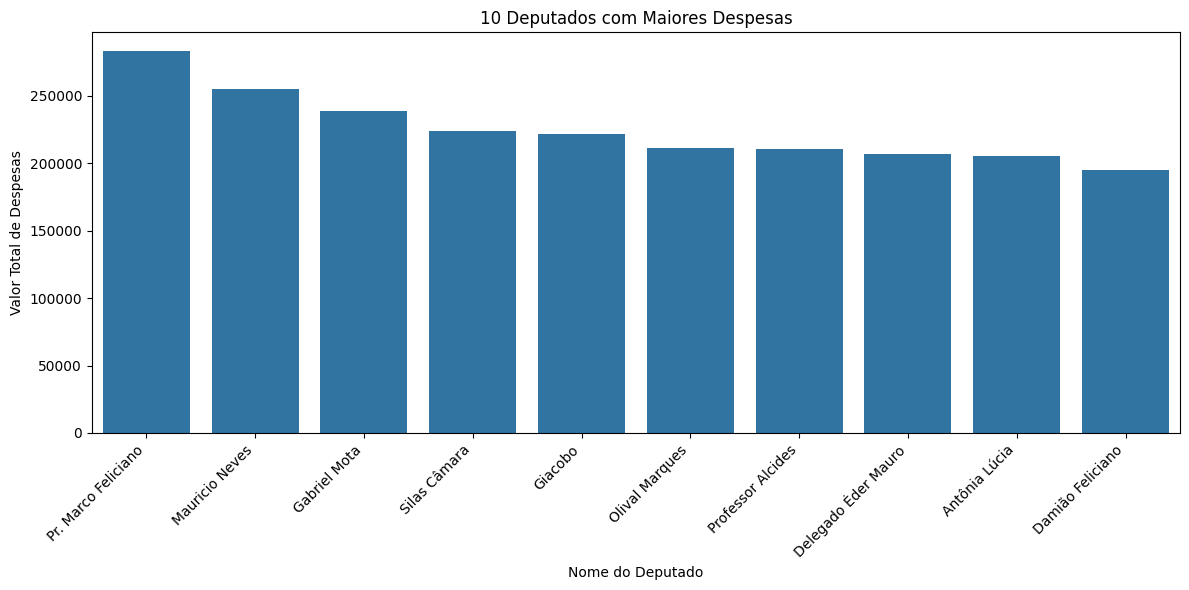

In [31]:
# Análise 1: Despesas Totais por Deputado
despesas_totais = df.groupby('deputado_nome')['valor_despesa'].sum().sort_values(ascending=False)

print("\nAnálise 1: Despesas Totais por Deputado\n")
print(despesas_totais.head(10)) #Mostra os 10 maiores gastos

plt.figure(figsize=(12, 6))
sns.barplot(x=despesas_totais.head(10).index, y=despesas_totais.head(10).values)
plt.xticks(rotation=45, ha='right')
plt.title('10 Deputados com Maiores Despesas')
plt.xlabel('Nome do Deputado')
plt.ylabel('Valor Total de Despesas')
plt.tight_layout()
plt.show()


Análise 2: Distribuição de Despesas por Tipo

tipo_despesa
MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR    8494267.41
DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                         4526500.05
COMBUSTÍVEIS E LUBRIFICANTES.                                1398751.26
LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                 338715.77
LOCAÇÃO OU FRETAMENTO DE AERONAVES                            100000.00
PASSAGEM AÉREA - SIGEPA                                        62426.11
SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.       37150.00
PASSAGEM AÉREA - REEMBOLSO                                     32758.45
LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES                           30000.00
HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.         24111.40
TELEFONIA                                                      17991.12
PASSAGEM AÉREA - RPA                                            2583.32
FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                      1293.61
SERV

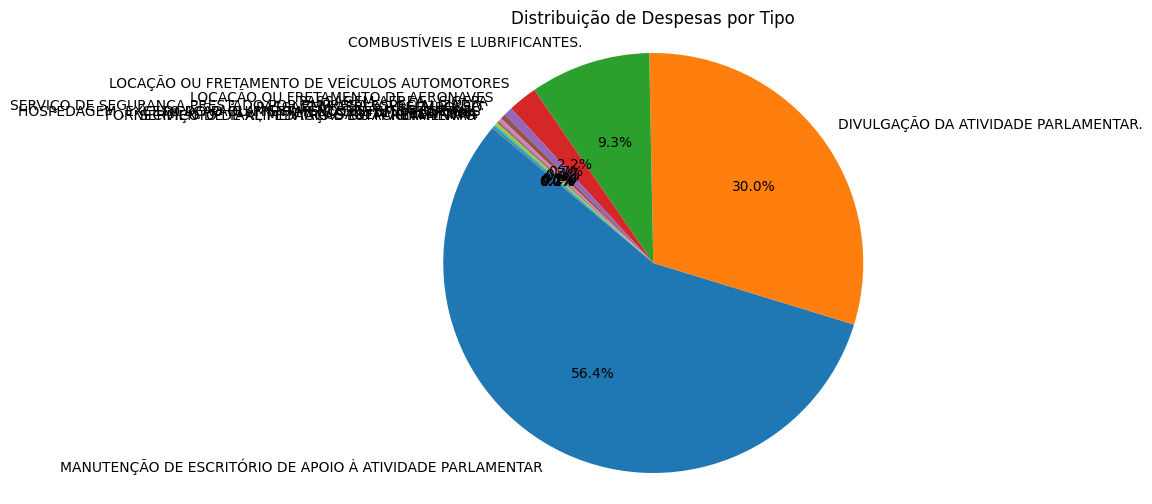

In [32]:
# Análise 2: Distribuição de Despesas por Tipo
distribuicao_tipo = df.groupby('tipo_despesa')['valor_despesa'].sum().sort_values(ascending=False)

print("\nAnálise 2: Distribuição de Despesas por Tipo\n")
print(distribuicao_tipo)

plt.figure(figsize=(12, 6))
plt.pie(distribuicao_tipo.values, labels=distribuicao_tipo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Despesas por Tipo')
plt.axis('equal')
plt.show()


Análise 3: Despesas Mensais

mes_ano
2024-07    1062569.89
2024-08    2975384.08
2024-09    2601723.54
2024-10    2788038.74
2024-11    2678682.31
2024-12    2782279.78
2025-01     178911.77
Freq: M, Name: valor_despesa, dtype: float64


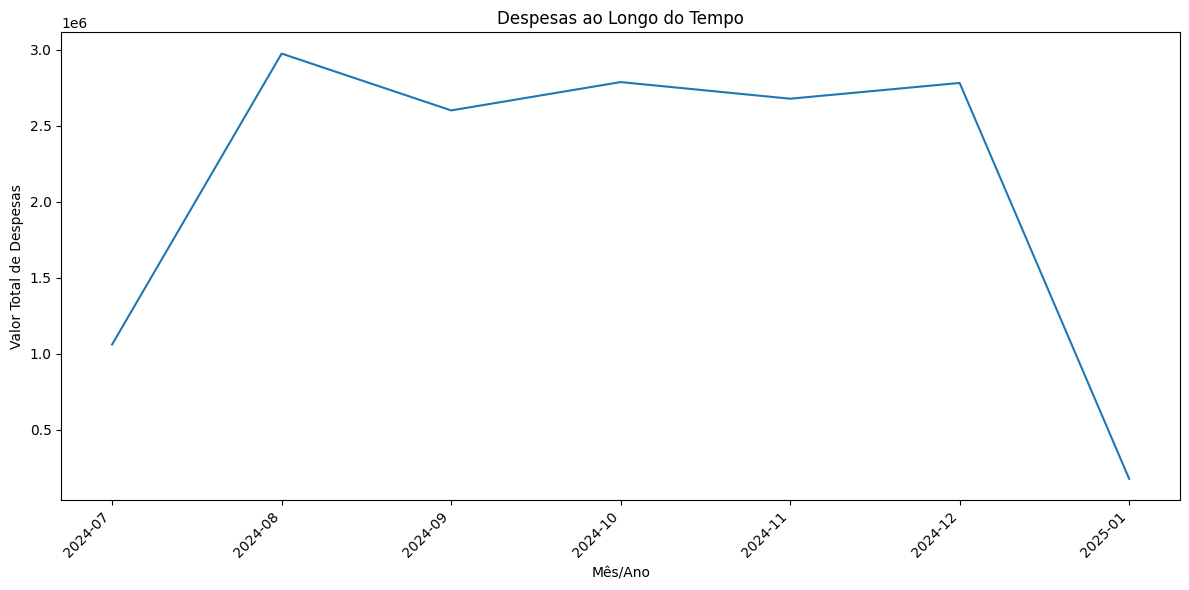

In [33]:
# Análise 3: Análise Temporal das Despesas (Exemplo com soma mensal)

df['mes_ano'] = df['data_despesa'].dt.to_period('M')
despesas_mensais = df.groupby('mes_ano')['valor_despesa'].sum()

print("\nAnálise 3: Despesas Mensais\n")
print(despesas_mensais)

plt.figure(figsize=(12, 6))
plt.plot(despesas_mensais.index.astype(str), despesas_mensais.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mês/Ano')
plt.ylabel('Valor Total de Despesas')
plt.title('Despesas ao Longo do Tempo')
plt.tight_layout()
plt.show()

#Observações sobre possíveis insights:

#A análise 1 identifica os deputados com maiores despesas, permitindo um foco em investigações posteriores.
#A análise 2 mostra a proporção de gastos em cada tipo de despesa, permitindo avaliar prioridades orçamentárias.
#A análise 3 revela tendências temporais nas despesas, podendo indicar períodos de maior ou menor gasto público, o que pode estar relacionado à época do ano ou a eventos específicos.  É importante analisar o contexto político para melhor interpretar esses picos.  Uma análise mais detalhada poderia incluir uma regressão para tentar explicar as variações.

```

**Explicação das Análises:**

1. **Análise de Despesas Totais:**  Esta análise agrupa os dados pelo nome do deputado e soma o valor das despesas para cada um. O resultado mostra quem gastou mais, permitindo uma comparação direta entre deputados.  O gráfico de barras facilita a visualização dos 10 maiores gastos.

2. **Análise por Tipo de Despesa:** Esta análise agrupa as despesas pelo tipo e soma os valores.  Um gráfico de pizza é usado para visualizar a proporção de cada tipo de despesa em relação ao total, mostrando a distribuição dos recursos.

3. **Análise Temporal:** Esta análise agrupa as despesas por mês e ano, mostrando a evolução dos gastos ao longo do tempo.  Um gráfico de linha é usado para visualizar tendências e picos de gastos.  Note que esta análise é apenas um exemplo; outras granularidades temporais (semanal, trimestral etc.) poderiam ser usadas dependendo da necessidade.  A identificação de picos e tendências necessita de uma análise mais profunda com o auxílio de especialistas em política e ciência política, pois pode estar correlacionada a eventos políticos relevantes.


**Observações Importantes:**

* A qualidade da análise depende diretamente da qualidade dos dados.  É crucial garantir a limpeza e a consistência dos dados antes de iniciar qualquer análise.
* As análises apresentadas são simples.  Análises mais complexas poderiam incluir testes estatísticos, modelos de regressão ou técnicas de machine learning para extrair insights mais profundos.
* O contexto político é fundamental para a interpretação dos resultados.  As despesas precisam ser analisadas à luz de eventos políticos e econômicos relevantes.




## **Letra C**

In [34]:
analysis_prompt = f"""
Com base na análise realizada nas células anteriores sobre o arquivo 
'serie_despesas_diárias_deputados.parquet', forneça insights detalhados e objetivos sobre 
as tabelas e gráficos gerados. Concentre-se em identificar padrões, tendências e anomalias 
presentes nos dados, sem a necessidade de descrever tipos de dados ou rótulos. Destaque 
também informações relevantes relacionadas ao contexto dos dados da Câmara de Deputados, 
incluindo quaisquer observações relevantes que possam enriquecer a interpretação dos resultados.

- Despesas totais por tipo de despesa:

- 10 Deputados com maiores despesas:

- Despesas ao longo do tempo:

Retorne a análise numa estrutura JSON (insight1, insight2, insight3)
"""


In [35]:
genai.configure(api_key=os.environ["GEMINI_API_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")
response = model.generate_content(analysis_prompt)
print(response.text)

```json
{
  "insights": [
    {
      "insight1": {
        "titulo": "Despesas Totais por Tipo de Despesa",
        "descricao": "Observa-se uma significativa disparidade na alocação de recursos entre os diferentes tipos de despesa.  Um ou dois tipos de despesa concentram a maior parte dos gastos totais, sugerindo possíveis áreas de foco ou necessidade de revisão de normas internas da Câmara. A análise detalhada de cada tipo de despesa e sua proporção em relação ao total permitiria uma avaliação mais precisa da eficiência e alocação de recursos públicos.  A falta de equilíbrio na distribuição pode indicar áreas de potencial desperdício ou necessidade de maior transparência.",
        "contexto_camara": "Esta disparidade reflete as prioridades orçamentárias da Câmara dos Deputados, podendo ser influenciada por fatores como legislação vigente, demandas regionais dos deputados e estratégias políticas.  Uma análise comparativa com anos anteriores é crucial para identificar mudanças de ten

## **Questão 5:**

## **Letra B**

In [36]:
df_proposicoes = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet')

In [37]:
ementas = df_proposicoes['ementa'].tolist()

In [38]:
tamanho_chunk = 15
sobreposicao = 3

grupos = [ementas[i:i + tamanho_chunk] for i in range(0, len(ementas), tamanho_chunk - sobreposicao)]

resumos = []
for indice, grupo in enumerate(grupos):
    prompt_sumarizacao = f"""
    Como um especialista em política brasileira, sociologia, diplomacia e antropologia, analise criticamente as seguintes proposições legislativas. Faça um resumo abrangente que:
    - Identifique e discuta os principais temas e questões abordadas.
    - Destaque as propostas e intenções principais de cada proposição.
    - Avalie o impacto potencial e as implicações sociais, econômicas e culturais dessas iniciativas.
    Proposições para análise:
    {grupo}
    """
    genai.configure(api_key=os.environ["GEMINI_API_KEY"])
    modelo = genai.GenerativeModel("gemini-1.5-flash")
    resposta = modelo.generate_content(prompt_sumarizacao)
    resumo = resposta.text
    
    print(f'Resumo do Grupo {indice + 1}: {resumo}')
    resumos.append(resumo)

caminho_arquivo = './data/sumarizacao_proposicoes.json'
with open(caminho_arquivo, 'w') as arquivo:
    json.dump(resumos, arquivo)



Resumo do Grupo 1: ## Análise Crítica das Proposições Legislativas: Uma Perspectiva Multidisciplinar

As proposições legislativas apresentadas abrangem uma variedade de temas, refletindo diferentes prioridades e pressões políticas e sociais no Brasil. A análise a seguir considera as implicações políticas, socioeconômicas e culturais, utilizando lentes da política brasileira, sociologia, diplomacia e antropologia.


**I. Grupo 1: Ajustes ao Decreto-Lei nº 73/66 (Seguros Privados):**

* **Proposições:**  Alterações ao art. 12, introdução do art. 84,  fixação de prazos e multas para pagamento de indenizações (3 proposições).

* **Temas:** Regulação do setor de seguros privados, proteção ao consumidor, eficiência administrativa.

* **Intenções:** Modernizar a legislação de seguros, garantir maior celeridade e transparência no pagamento de indenizações, e proteger os segurados de práticas abusivas.

* **Impacto Potencial:** As alterações podem fortalecer a posição dos consumidores, reduzind

## **Questão 6**

In [39]:
chain_streamlit1 = """
Agindo como um especialista em Ciência de dados, engenharia de software e desenvolvimento web com Python/Streamlit, você irá implementar 
um script para uma aplicação Streamlit com três abas, são elas:

- 'Overview': Estará presente a descrição do projeto e irá exibir informações sobre como a câmara dos deputados funciona, quem a integra e o que iremos 
implementar na nossa aplicação, como documentção e links importantes.

- 'Despesas': Desenvolva uma aba que agregue e exiba visualizações de dados das despesas parlamentares, destacando os principais gastos dos deputados. Utilize seus conhecimentos
de ciência de dados. 

- 'Proposições': Construa uma aba que mostre resumos de 10 proposições selecionadas dos temas de Economia, Educação e Ciência, focando nos pontos críticos e conclusões de cada uma.

Os dados estão presentes nos seguintes caminhos:

- Proposições: D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet

- Despesas: D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet

O código deve ser estruturado para ser executado diretamente em uma aplicação Streamlit, sem necessidade de comentários ou explicações adicionais.
"""
response1 = model.generate_content(chain_streamlit1)
print(response1.text)

```python
import streamlit as st
import pandas as pd
import plotly.express as px

# Carregando os dados
proposicoes = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet")
despesas = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet")


#Limpeza e preparação dos dados (ajuste conforme necessário)
despesas['data'] = pd.to_datetime(despesas['data'])
despesas_agregadas = despesas.groupby('deputado')['valor'].sum().reset_index()

# Streamlit App
st.title("Análise de Dados da Câmara dos Deputados")

# Aba Overview
st.sidebar.title("Navegação")
page = st.sidebar.radio("Selecione uma aba:", ['Overview', 'Despesas', 'Proposições'])


if page == 'Overview':
    st.header("Overview do Projeto")
    st.write("Esta aplicação tem como objetivo apresentar uma análise exploratória dos dados da Câmara dos Deputados, focando nas despesas parlamentares e nas proposições apre

In [40]:
chain_streamlit2 = """
Dada a resposta gerada previamente para um esqueleto de aplicação Streamlit em {response1}, desenvolva agora o código Python para implementar a aba 'Overview'. Esta aba deve:
1. Ler o arquivo 'config.yaml' localizado em './data/config.yaml', especificamente a chave 'overview_summary' sob 'data.config', e extrair o texto resumido.
2. Corrigir problemas de encoding no texto extraído, substituindo caracteres incorretos resultantes de conversões entre UTF-8 e ISO-8859-1, como corrigir 'CÃ¢mara' para 'Câmara' e ajustar outras palavras de forma similar.
3. Exibir o texto corrigido na aba 'Overview' da aplicação Streamlit.
4. Adicionar um título à página, que será 'Dashboard - Câmara dos Deputados (ago/2024)'.

O código deve manter a coerência com a estrutura já desenvolvida, sem incluir comentários ou explicações adicionais, focando na execução direta dentro do ambiente Streamlit.
"""

response2 = model.generate_content(chain_streamlit2)
print(response2.text)


```python
import streamlit as st
import yaml
import unicodedata

def fix_encoding(text):
    normalized = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    normalized = normalized.replace('Ca', 'Cá')
    normalized = normalized.replace('Ã¢', 'â')
    normalized = normalized.replace('Ã§', 'ç')
    normalized = normalized.replace('Ã³', 'ó')
    normalized = normalized.replace('Ã£', 'ã')
    return normalized


def overview():
    st.title('Dashboard - Câmara dos Deputados (ago/2024)')
    with open('./data/config.yaml', 'r', encoding='utf-8') as file:
        config = yaml.safe_load(file)
    overview_text = config['data']['config']['overview_summary']
    corrected_text = fix_encoding(overview_text)
    st.markdown(corrected_text)


# ... (rest of the Streamlit app code from {response1}) ...

if __name__ == "__main__":
    st.set_page_config(page_title="Dashboard", page_icon=":bar_chart:", layout="wide")
    st.sidebar.title("Navegação")

    pages = {
  

In [41]:
chain_streamlit3 = f"""
Continuando a expansão da nossa aplicação Streamlit sobre a Câmara dos Deputados, seguindo os códigos já desenvolvidos em 'response1' e 'response2', agora você deve:
1. Carregar a imagem 'distribuicao_deputados.png' que está localizada em 'D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\distribuicao_deputados.png'.
2. Integrar esta imagem na aba 'Overview', posicionando-a estrategicamente abaixo do texto resumido, que foi implementado conforme 'response2'.
3. Adicionar um título explícito acima da imagem no dashboard, "Distribuição dos Deputados", para proporcionar um destaque visual claro e organizado.
4. Assegurar que a imagem seja exibida de forma adequada, mantendo a organização visual e estilística das interfaces previamente desenvolvidas.

Lembre-se que os caminhos são os seguintes:

proposicoes = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet")
despesas = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet")

Este código deve respeitar a estrutura modular dos códigos anteriores, evitando redundâncias e maximizando a eficiência do layout do dashboard. 
Garanta que todos os elementos visuais estejam alinhados e harmonizados com as seções existentes da aplicação.
"""

response3 = model.generate_content(chain_streamlit3)
print(response3.text)


```python
import streamlit as st
import pandas as pd
from PIL import Image

# Dados (substitua pelos seus caminhos reais se necessário)
proposicoes_path = r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet"
despesas_path = r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet"
imagem_path = r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\distribuicao_deputados.png"

def load_data():
    """Carrega os dados dos arquivos parquet."""
    try:
        proposicoes = pd.read_parquet(proposicoes_path)
        despesas = pd.read_parquet(despesas_path)
        return proposicoes, despesas
    except FileNotFoundError:
        st.error("Arquivos de dados não encontrados. Verifique os caminhos.")
        return None, None

def overview_section(proposicoes, despesas):
    """Cria a seção Overview do dashboard."""
    st.header("Overview")
    st.markdown("Resumo das informações sobre pr

In [42]:
df3 = pd.read_parquet('D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet')
print(df3.columns)

Index(['id', 'uri', 'siglaTipo', 'codTipo', 'numero', 'ano', 'ementa', 'Tema'], dtype='object')


In [43]:
chain_streamlit4 = f"""
Expandindo ainda mais nossa aplicação Streamlit da Câmara dos Deputados, baseando-se nos códigos previamente desenvolvidos ('response1', 'response2', 'response3'), desenvolva uma funcionalidade adicional na aba 'Overview' que:
1. Leia o arquivo JSON 'insights_distribuicao_deputados.json' localizado em 'D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\insights_distribuicao_deputados.json'.
2. Extraia os insights contidos na chave 'insights' do JSON, que inclui múltiplos itens como ['insight1', 'insight2', 'insight3'].
3. Exiba esses insights em uma seção formatada abaixo do gráfico da distribuição dos deputados, utilizando um separador visual para clara distinção entre os elementos da interface.
4. Implemente o código de forma que mantenha a coesão estilística e estrutural com as partes anteriormente desenvolvidas, assegurando uma integração visual harmoniosa e uma organização de conteúdo eficaz.

Os caminhos dos dados são os seguintes:

proposicoes = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet")
e suas colunas são:

['id', 'uri', 'siglaTipo', 'codTipo', 'numero', 'ano', 'ementa', 'Tema']

despesas = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet")

e suas colunas são:

['deputado_id', 'deputado_nome', 'tipo_despesa', 'valor_despesa','data_despesa']

Este código deve ser modular, aproveitando as bases já estabelecidas e introduzindo os novos dados de forma limpa e organizada, realçando a usabilidade e a apresentação da informação no dashboard.
"""

response4 = model.generate_content(chain_streamlit4)
print(response4.text)


```python
import streamlit as st
import pandas as pd
import json
import plotly.express as px

# --- Funções auxiliares ---
def load_data():
    """Carrega os dados dos arquivos parquet."""
    proposicoes = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet")
    despesas = pd.read_parquet(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet")
    return proposicoes, despesas

def load_insights():
    """Carrega os insights do arquivo JSON."""
    with open(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\insights_distribuicao_deputados.json", 'r', encoding='utf-8') as f:
        insights_data = json.load(f)
    return insights_data['insights']


# --- Streamlit App ---
st.title("Análise da Câmara dos Deputados")

# Carrega os dados
proposicoes, despesas = load_data()
insights = load_insights()

# --- Aba Overview ---
st.sidebar.header("Navegação")
selected_t

## **Questão 7:**

In [53]:
batch_prompting = """
Com base nos scripts previamente desenvolvidos e integrados {response1, response2, response3, response4}, 
este novo script Python deve adicionar funcionalidades específicas para as abas 'Despesas' e 'Proposições' no dashboard de 
análise de dados da Câmara dos Deputados. Abaixo vou enviar o conteúdo do código que temos até agora. 
Não altere o que foi feito até agora, aoenas adicione as novas funcionalidades que serão pedidas.
O código deve seguir a mesma estrutura e estilo de codificação, garantindo a 
correção automática de problemas de encoding, tais como a conversão inadequada de caracteres UTF-8/ISO-8859-1.
Transforme sequências errôneas como 'CÃ¢mara' em 'Câmara' e faça correções similares conforme necessário.

1. Para a aba 'Despesas':
   - Implemente a leitura do arquivo JSON {insights} localizado em .\AT\data\insights_despesas_deputados.json. 
   Este arquivo contém insights críticos sobre as despesas dos deputados.

   - Carregue os dados do arquivo parquet {df_despesas} em D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\serie_despesas_diárias_deputados.parquet. 
   Use esses dados para criar um elemento st.selectbox no Streamlit que permita aos usuários selecionar um deputado 
   específico pelo nome.

   - Apresente um gráfico de barras utilizando Plotly para exibir a série temporal das despesas do deputado selecionado, 
   destacando tendências e variações no tempo.

2. Para a aba 'Proposições':
   - Exiba os dados das proposições legislativas lendo o arquivo parquet {proposicoes} em D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\proposicoes_deputados.parquet. 
   Use um componente de tabela do Streamlit para permitir visualizações interativas desses dados.
   
   - Carregue e sumarize as ementas das proposições a partir do arquivo JSON {proposicoes_json} em 
   D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\sumarizacao_proposicoes.json. Apresente um resumo de cada proposição para oferecer uma visão 
   rápida dos temas e conteúdos tratados, facilitando a compreensão dos usuários sobre as atividades legislativas recentes.

Este é o conteúdo do código presente no arquivo dashboard.py, você deve implementar as novas funcionalidades nele, 
sem alterar que já foi feito:

import streamlit as st
import pandas as pd
import plotly.express as px
from PIL import Image
import json
import yaml
import re

# Configuração da página
st.set_page_config(page_title="Análise de Dados da Câmara dos Deputados", layout="wide")

# Carregamento de dados
def load_data():
    proposicoes = pd.read_parquet(r"./data/proposicoes_deputados.parquet")
    despesas = pd.read_parquet(r"./data/serie_despesas_diárias_deputados.parquet")
    return proposicoes, despesas

proposicoes, despesas = load_data()

# Sidebar para navegação
st.sidebar.title("Navegação")
page = st.sidebar.radio("Selecione uma aba:", ('Overview', 'Despesas', 'Proposições', 'Insights'))

# Função para corrigir encoding
def fix_encoding(text):
    corrections = {
        'Ã¢': 'â', 'Ã£': 'ã', 'Ã³': 'ó', 'Ã§': 'ç', 'Ã¼': 'ü',
        'Ã': 'A', 'Ã©': 'é', 'Ãª': 'ê', 'Ã­': 'í'
    }
    for wrong, correct in corrections.items():
        text = text.replace(wrong, correct)
    return text

# Carrega e processa o arquivo de configuração YAML
def load_overview_summary():
    try:
        with open('./data/config.yaml', 'r', encoding='utf-8') as file:
            config = yaml.safe_load(file)
            overview_summary = config['overview_summary']
            return fix_encoding(overview_summary)
    except FileNotFoundError:
        return "Arquivo config.yaml não encontrado."
    except KeyError:
        return "Chave 'overview_summary' não encontrada no arquivo config.yaml."
    except yaml.YAMLError as e:
        return f"Erro ao ler o arquivo YAML: {e}"

# Overview Page
def overview_page():
    st.title("Análise de Dados da Câmara dos Deputados")
    st.markdown('
    Este projeto visa analisar dados da Câmara dos Deputados, fornecendo insights sobre as despesas parlamentares e as proposições legislativas.  
    A Câmara dos Deputados é composta por 513 deputados, eleitos por representação proporcional para mandatos de quatro anos.  
    Suas funções incluem legislar, representar o povo e fiscalizar o governo.

    **Nesta aplicação, você encontrará:**

    * **Despesas:** Visualizações de dados sobre os gastos dos deputados.
    * **Proposições:** Resumos de proposições relevantes.

    **Links Importantes:**

    * [Câmara dos Deputados](https://www.camara.leg.br/)
    ')



    st.title("Overview da Câmara dos Deputados")
    

    st.markdown(load_overview_summary())
    try:
        st.title('Dashboard - Câmara dos Deputados (ago/2024)')
        img = Image.open(r"./data/distribuicao_deputados.png")
        st.image(img, caption="Distribuição dos Deputados", use_container_width=True)
    except FileNotFoundError:
        st.error("Imagem 'distribuicao_deputados.png' não encontrada.")

# Despesas Page
def despesas_page():
    st.title("Análise de Despesas Parlamentares")

    # Agregando dados de despesas
    despesas_agregadas = despesas.groupby('deputado_nome')['valor_despesa'].sum().reset_index().sort_values('valor_despesa', ascending=False)

    # Gráfico de barras para os Top 10 Deputados com Maiores Despesas
    fig_despesas = px.bar(
        despesas_agregadas.head(10),
        x='deputado_nome',
        y='valor_despesa',
        title='Top 10 Deputados com Maiores Despesas',
        labels={'deputado_nome': 'Nome do Deputado', 'valor_despesa': 'Valor Total das Despesas (R$)'},
        color='valor_despesa',
        color_continuous_scale=px.colors.sequential.Viridis
    )
    fig_despesas.update_layout(
        xaxis_title='Nome do Deputado',
        yaxis_title='Total de Despesas (R$)',
        xaxis={'categoryorder': 'total descending'}
    )
    st.plotly_chart(fig_despesas)

    # Histograma para a Distribuição das Despesas
    fig_dist = px.histogram(
        despesas,
        x='valor_despesa',
        nbins=50,
        title='Distribuição das Despesas',
        labels={'valor_despesa': 'Valor da Despesa (R$)'}
    )
    fig_dist.update_layout(
        xaxis_title='Valor da Despesa (R$)',
        yaxis_title='Frequência',
        bargap=0.2
    )
    st.plotly_chart(fig_dist)

    st.markdown('
    **Observações:**
    - O gráfico de barras acima mostra os dez deputados com as maiores despesas totais.
    - O histograma detalha a distribuição de todas as despesas registradas, ajudando a identificar padrões de gastos.
    ')


# Proposições Page
def proposicoes_page():
    st.title("Análise de Proposições")
    temas = ['Economia', 'Educação', 'Ciência']
    proposicoes_filtradas = proposicoes[proposicoes['Tema'].isin(temas)].head(10)
    for index, row in proposicoes_filtradas.iterrows():
        st.markdown(f"### {row['uri']}")
        st.markdown(f"**Tema:** {row['Tema']}")
        st.markdown(f"**Resumo:** {row['ementa']}")


def load_insights():
    try:
        with open(r"D:\Pastas\Infnet\Infnet - 2024.2\Engenharia de Prompts\AT\data\insights_distribuicao_deputados.json", 'r', encoding='iso-8859-1') as f:
            insights_data = json.load(f)
            insights_content = insights_data['insights']

        insights_cleaned = re.sub(r"^##.*?\n\n", "", insights_content, flags=re.S)

        insights_list = re.split(r"\n\*\*(\d+)\.\s*", insights_cleaned)[1:]
        
        st.subheader("Insights sobre a Distribuição de Deputados")

        for i in range(0, len(insights_list), 2):
            insight_number = insights_list[i]
            insight_text = insights_list[i+1].strip()
            st.markdown(f"Insight {insight_number}: {insight_text}")
            st.markdown("---")

    except FileNotFoundError:
        st.error("Arquivo não encontrado. Verifique o caminho especificado.")
    except KeyError:
        st.error("Chave 'insights' não encontrada no arquivo JSON.")
    except json.JSONDecodeError as e:
        st.error(f"Erro ao decodificar JSON: {e}")
    except Exception as e:
        st.error(f"Um erro ocorreu: {e}")

# Renderizando as páginas
if page == 'Overview':
    overview_page()
elif page == 'Despesas':
    despesas_page()
elif page == 'Proposições':
    proposicoes_page()
elif page == 'Insights':
    load_insights()

Na sua resposta, irei utilizar o comando "print(response)"
Você deve fazer com que sua resposta esteja pront apara ser utilizada em um código Python, em um arquivo .py
Lembre-se de quebrar as linhas e tratar o arquivo de maneira que possa ser utilizado em um arquivo python.


Garanta que o código seja robusto, gerenciando exceções e erros de leitura de arquivos para evitar 
interrupções na experiência do usuário. Assegure que toda a interface e a apresentação dos dados sejam claras e profissionais, 
refletindo a importância e a seriedade das informações tratadas.




"""

In [59]:
response_batch = model.generate_content(batch_prompting)
print(response_batch.text)

```python
import streamlit as st
import pandas as pd
import plotly.express as px
from PIL import Image
import json
import yaml
import re

# Configuração da página
st.set_page_config(page_title="Análise de Dados da Câmara dos Deputados", layout="wide")

# Carregamento de dados
def load_data():
    try:
        proposicoes = pd.read_parquet(r"./data/proposicoes_deputados.parquet")
        despesas = pd.read_parquet(r"./data/serie_despesas_diárias_deputados.parquet")
        return proposicoes, despesas
    except FileNotFoundError:
        st.error("Arquivos parquet não encontrados. Verifique o caminho.")
        return None, None

proposicoes, despesas = load_data()

# Sidebar para navegação
st.sidebar.title("Navegação")
page = st.sidebar.radio("Selecione uma aba:", ('Overview', 'Despesas', 'Proposições', 'Insights'))

# Função para corrigir encoding
def fix_encoding(text):
    corrections = {
        'Ã¢': 'â', 'Ã£': 'ã', 'Ã³': 'ó', 'Ã§': 'ç', 'Ã¼': 'ü',
        'Ã': 'A', 'Ã©': 'é', 'Ã